In [92]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [2]:
ROOT = Path('/home/kdang/dataset/amazon/')
TRAIN = ROOT / 'train-jpg'
TRAIN_CSV = ROOT / 'train.csv'

In [3]:
df = pd.read_csv(TRAIN_CSV)

In [4]:
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [9]:
df['tag_list'] = df['tags'].apply(lambda x: x.split())
all_tags = list(df['tag_list'])
all_tags = sorted(list(set([i for sublist in all_tags for i in sublist])))

all_tags

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [26]:
for tag in all_tags:
    df[tag] = pd.Series(np.zeros(len(df)))

df.head()

,image_name,tags,tag_list,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,train_0,haze primary,"[haze, primary]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train_1,agriculture clear primary water,"[agriculture, clear, primary, water]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train_2,clear primary,"[clear, primary]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train_3,clear primary,"[clear, primary]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,train_4,agriculture clear habitation primary road,"[agriculture, clear, habitation, primary, road]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
def apply_tag(row):
    for tag in row['tag_list']:
        row[tag] = 1
    return row
df = df.apply(apply_tag, axis=1)

In [31]:
all_tags_dict = {k: 0 for k in all_tags}

In [32]:
for i, row in df.iterrows():
    for tag in row['tag_list']:
        all_tags_dict[tag] += 1
print(all_tags_dict)

{'agriculture': 12315, 'artisinal_mine': 339, 'bare_ground': 862, 'blooming': 332, 'blow_down': 101, 'clear': 28431, 'cloudy': 2089, 'conventional_mine': 100, 'cultivation': 4547, 'habitation': 3660, 'haze': 2697, 'partly_cloudy': 7261, 'primary': 37513, 'road': 8071, 'selective_logging': 340, 'slash_burn': 209, 'water': 7411}


In [33]:
all_tag_values = []
for tag in all_tags:
    all_tag_values.append(all_tags_dict[tag])
print(all_tags, all_tag_values)

['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water'] [12315, 339, 862, 332, 101, 28431, 2089, 100, 4547, 3660, 2697, 7261, 37513, 8071, 340, 209, 7411]


           tag       num
0      primary  0.926727
1        clear  0.702364
2  agriculture  0.304232
3         road  0.199387
4        water  0.183083


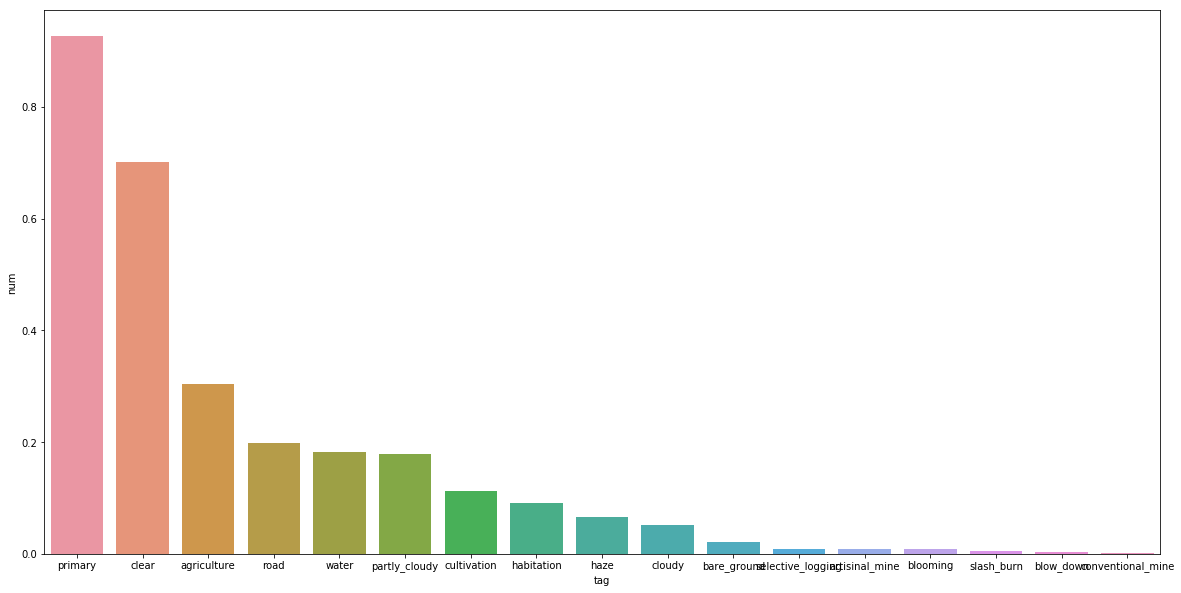

In [63]:
sorted_tags, sorted_tag_nums = zip(*sorted(zip(all_tags, all_tag_values), key=lambda x: x[1], reverse=True))
tags_df = pd.DataFrame()
tags_df['tag'] = sorted_tags
tags_df['num'] = sorted_tag_nums
tags_df.sort_values('num', ascending=False, inplace=True)
tags_df['num'] = tags_df['num'] / len(df)
print(tags_df.head())
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='tag', y='num', data=tags_df, ax=ax)

['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']


[Text(0, 0, ''),
 Text(0, 0, 'agriculture'),
 Text(0, 0, 'artisinal_mine'),
 Text(0, 0, 'bare_ground'),
 Text(0, 0, 'blooming'),
 Text(0, 0, 'blow_down'),
 Text(0, 0, 'clear'),
 Text(0, 0, 'cloudy'),
 Text(0, 0, 'conventional_mine'),
 Text(0, 0, 'cultivation'),
 Text(0, 0, 'habitation'),
 Text(0, 0, 'haze'),
 Text(0, 0, 'partly_cloudy'),
 Text(0, 0, 'primary'),
 Text(0, 0, 'road'),
 Text(0, 0, 'selective_logging'),
 Text(0, 0, 'slash_burn'),
 Text(0, 0, 'water')]

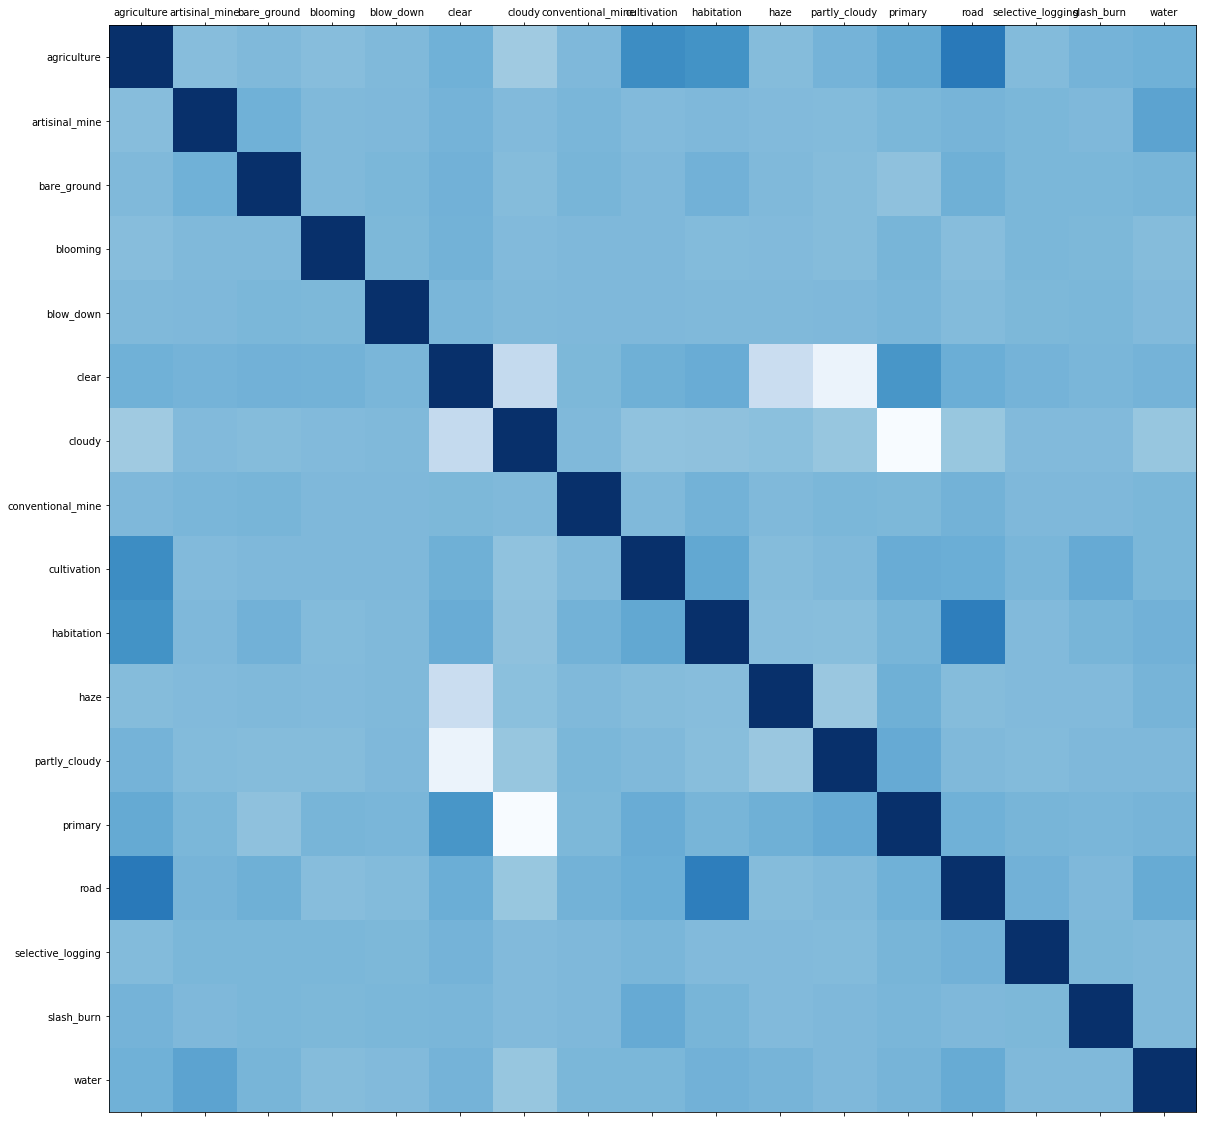

In [109]:
features_df = df[all_tags]
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
# print(features_df[:100])
# df.head()
print(all_tags)
ax.matshow(features_df.corr(),cmap=plt.cm.Blues)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticklabels([''] + all_tags)
ax.set_yticklabels([''] + all_tags)
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
